# Whisker plots ~Valentine paper

In [23]:
import seaborn
import ast
import matplotlib.pylab as plt
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
method_results = pd.read_csv("method_results.csv")
print(method_results.shape)
method_results = method_results[method_results['recall_at_sizeof_ground_truth'].notna()]
print(method_results.shape)

(157872, 21)
(77574, 21)


C:\Users\Phaina\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
method_results.head(50)

,experiment_name,method,elapsed_process_time,join_type,schema_noisy_verbatim,instances_noisy_verbatim,0,precision,recall,f1_score,...,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,0.1,precision_at_20_percent,precision_at_40_percent,precision_at_60_percent,precision_at_80_percent
0,book_titles-collaborative_books_df,COMA_OPT,3.421875,join,verbatim,verbatim,NaN,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
1,book_titles_-_collaborative_book_metadata,COMA_OPT,2.781250,join,verbatim,verbatim,NaN,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
2,collaborative_book_metadata-collaborative_book...,COMA_OPT,0.593750,join,verbatim,verbatim,NaN,0.500000,1.000000,0.666667,...,0.500000,0.500000,0.666667,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN
3,Frosttage_Heissetage,COMA_OPT,0.015625,union,verbatim,verbatim,NaN,0.937500,0.937500,0.937500,...,0.800000,0.875000,0.916667,0.933333,0.937500,NaN,NaN,NaN,NaN,NaN
4,Frosttage_Niederschlag,COMA_OPT,0.062500,union,verbatim,verbatim,NaN,0.937500,0.937500,0.937500,...,0.800000,0.875000,0.916667,0.933333,0.937500,NaN,NaN,NaN,NaN,NaN
5,Frosttage_Stationsnamen,COMA_OPT,0.031250,join,verbatim,verbatim,NaN,0.500000,1.000000,0.666667,...,1.000000,1.000000,0.500000,0.500000,1.000000,NaN,NaN,NaN,NaN,NaN
6,Heissetage_Niederschlag,COMA_OPT,0.062500,union,verbatim,verbatim,NaN,0.937500,0.937500,0.937500,...,0.800000,0.875000,0.916667,0.933333,0.937500,NaN,NaN,NaN,NaN,NaN
7,Heissetage_Stationsnamen,COMA_OPT,0.031250,join,verbatim,verbatim,NaN,0.500000,1.000000,0.666667,...,1.000000,1.000000,0.500000,0.500000,1.000000,NaN,NaN,NaN,NaN,NaN
8,Niederschlag_Stationsnamen,COMA_OPT,0.125000,join,verbatim,verbatim,NaN,0.500000,1.000000,0.666667,...,1.000000,1.000000,0.500000,0.500000,1.000000,NaN,NaN,NaN,NaN,NaN
9,Geographie_Parameter,COMA_OPT,0.000000,join,verbatim,verbatim,NaN,0.800000,1.000000,0.888889,...,1.000000,1.000000,1.000000,0.800000,1.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
def extract_simple_method_name(method_name):
    if "Coma{" in method_name:
        if "COMA_OPT_INST" in method_name:
            return "COMA_OPT_INST"
        elif "COMA_OPT" in method_name:
            return "COMA_OPT"
        else:
            return method_name
    elif "CorrelationClustering" in method_name:
        return "DistributionBased"
    if "{" in method_name:
        return method_name.split("{")[0]
    elif "_" in method_name and "COMA" not in method_name and "JL" not in method_name:
        return method_name.split("_")[0]
    elif "JL_ColumnNamesOnly" in method_name:
        return "JaccardLevenColumnNames"
    else:
        return method_name

In [5]:
method_results["simple_method_name"] = method_results["method"].apply(extract_simple_method_name)

In [6]:
method_results["simple_method_name"].value_counts()

Cupid                    57441
CorrelationClustering     9792
JL_ColumnNamesOnly        2990
JaccardLevenMatcher       2720
SemProp                   2161
COMA_OPT                   591
COMA_OPT_INST              591
SimilarityFlooding         591
EmbDI                      544
DistributionBased          153
Name: simple_method_name, dtype: int64

In [26]:
#method_results.groupby(["simple_method_name", "method"]).count()

In [27]:
d = {'Cupid': 'CU',
     'CorrelationClustering': 'CC', 
     'JL_ColumnNamesOnly': 'JLC', 
     'JaccardLevenMatcher': 'JL',
    'SemProp': 'SP',
    'COMA_OPT': 'COS',
    'COMA_OPT_INST': 'COI',
    'SimilarityFlooding': 'SF',
    'EmbDI': 'EMB',
    'DistributionBased': 'DB'}
method_results['short_method_name'] = method_results['simple_method_name'].map(d)

In [28]:
method_results.head()

,experiment_name,method,elapsed_process_time,join_type,schema_noisy_verbatim,instances_noisy_verbatim,0,precision,recall,f1_score,...,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,0.1,precision_at_20_percent,precision_at_40_percent,precision_at_60_percent,precision_at_80_percent,simple_method_name,short_method_name
0,book_titles-collaborative_books_df,COMA_OPT,3.421875,join,verbatim,verbatim,NaN,1.0000,1.0000,1.000000,...,1.000000,1.000000,1.0000,NaN,NaN,NaN,NaN,NaN,COMA_OPT,COS
1,book_titles_-_collaborative_book_metadata,COMA_OPT,2.781250,join,verbatim,verbatim,NaN,1.0000,1.0000,1.000000,...,1.000000,1.000000,1.0000,NaN,NaN,NaN,NaN,NaN,COMA_OPT,COS
2,collaborative_book_metadata-collaborative_book...,COMA_OPT,0.593750,join,verbatim,verbatim,NaN,0.5000,1.0000,0.666667,...,0.666667,0.500000,0.5000,NaN,NaN,NaN,NaN,NaN,COMA_OPT,COS
3,Frosttage_Heissetage,COMA_OPT,0.015625,union,verbatim,verbatim,NaN,0.9375,0.9375,0.937500,...,0.916667,0.933333,0.9375,NaN,NaN,NaN,NaN,NaN,COMA_OPT,COS
4,Frosttage_Niederschlag,COMA_OPT,0.062500,union,verbatim,verbatim,NaN,0.9375,0.9375,0.937500,...,0.916667,0.933333,0.9375,NaN,NaN,NaN,NaN,NaN,COMA_OPT,COS


In [29]:
len(method_results)

77574

# Whisker plots viz
## All data

<AxesSubplot:xlabel='recall_at_sizeof_ground_truth', ylabel='simple_method_name'>

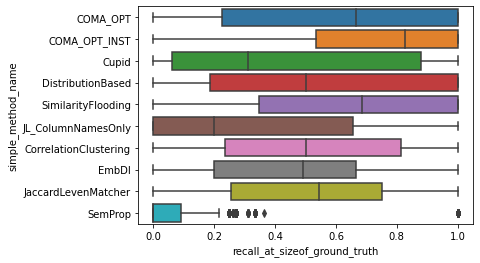

In [8]:
seaborn.boxplot(data=method_results, x="recall_at_sizeof_ground_truth", y="simple_method_name")

## Noisy schemata, schema-based matching algorithms (Fig. 4)

### All join cases

<AxesSubplot:xlabel='recall_at_sizeof_ground_truth', ylabel='simple_method_name'>

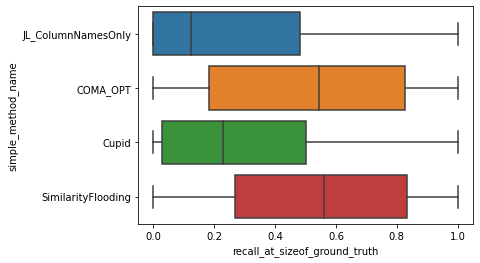

In [31]:
method_results_noisyschema = method_results[method_results['schema_noisy_verbatim'] == "noisy"]
#method_results_noisyschema.head()
method_results_noisyschema_schemaonly = method_results_noisyschema[method_results_noisyschema['simple_method_name'].isin(('Cupid', 'SimilarityFlooding', 'COMA_OPT', 'JL_ColumnNamesOnly'))]
#method_results_noisyschema_schemaonly.head()
seaborn.boxplot(data=method_results_noisyschema_schemaonly, x="recall_at_sizeof_ground_truth", y="simple_method_name")

<AxesSubplot:xlabel='simple_method_name', ylabel='recall_at_sizeof_ground_truth'>

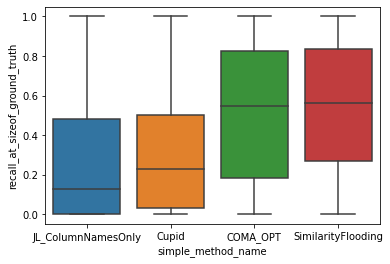

In [32]:
seaborn.boxplot(data=method_results_noisyschema_schemaonly, 
                y="recall_at_sizeof_ground_truth", 
                x="simple_method_name", 
                orient="v",
               order=["JL_ColumnNamesOnly", "Cupid", "COMA_OPT", "SimilarityFlooding"])

In [33]:
method_results_noisyschema['simple_method_name'].value_counts()

Cupid                    43200
CorrelationClustering     8100
JL_ColumnNamesOnly        2255
JaccardLevenMatcher       2250
SemProp                   1801
COMA_OPT                   450
COMA_OPT_INST              450
EmbDI                      450
SimilarityFlooding         450
Name: simple_method_name, dtype: int64

### Divided by join case

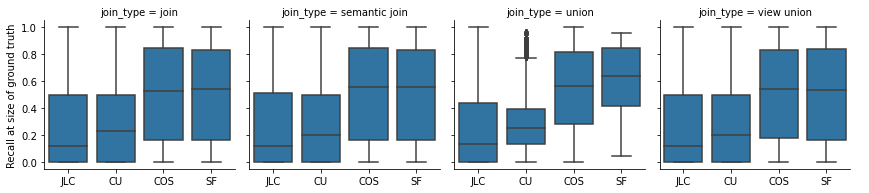

In [48]:
g = seaborn.FacetGrid(method_results_noisyschema_schemaonly, col="join_type")
#g.map(seaborn.boxplot, x="recall_at_sizeof_ground_truth", y="simple_method_name")
g.map_dataframe(seaborn.boxplot, y="recall_at_sizeof_ground_truth", x="short_method_name", order=["JLC", "CU", "COS", "SF"])
g.add_legend()
for i in range(4):
    g.axes[0, i].set_xlabel('')
    g.axes[0, i].set_ylabel('Recall at size of ground truth')
plt.savefig('fig/noisy_schemata_schema_based_matching_valentine.png')

In [12]:
method_results_noisyschema.groupby(['join_type', 'simple_method_name']).size()

join_type      simple_method_name   
join           COMA_OPT                   120
               COMA_OPT_INST              120
               CorrelationClustering     2160
               Cupid                    11520
               EmbDI                      120
               JL_ColumnNamesOnly         600
               JaccardLevenMatcher        600
               SemProp                    480
               SimilarityFlooding         120
semantic join  COMA_OPT                   120
               COMA_OPT_INST              120
               CorrelationClustering     2160
               Cupid                    11520
               EmbDI                      120
               JL_ColumnNamesOnly         600
               JaccardLevenMatcher        600
               SemProp                    480
               SimilarityFlooding         120
union          COMA_OPT                    90
               COMA_OPT_INST               90
               CorrelationClustering     16

## Verbatim schemata, schema-based matching algorithms (opposite of Fig. 4)

### All join cases

(18168, 23)
(15258, 23)


<AxesSubplot:xlabel='recall_at_sizeof_ground_truth', ylabel='simple_method_name'>

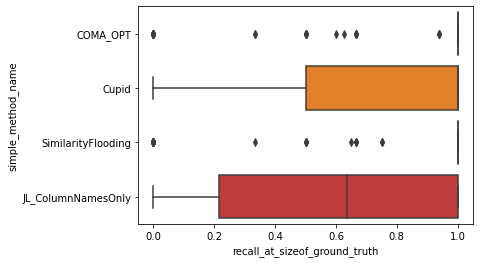

In [49]:
method_results_verbatimschema = method_results[method_results['schema_noisy_verbatim'] == "verbatim"]
print(method_results_verbatimschema.shape)
method_results_verbatimschema_schemaonly = method_results_verbatimschema[method_results_verbatimschema['simple_method_name'].isin(('Cupid', 'SimilarityFlooding', 'COMA_OPT', 'JL_ColumnNamesOnly'))]
print(method_results_verbatimschema_schemaonly.shape)
seaborn.boxplot(data=method_results_verbatimschema_schemaonly, x="recall_at_sizeof_ground_truth", y="simple_method_name")

In [89]:
method_results_verbatimschema_schemaonly["simple_method_name"].value_counts()

Cupid                 14241
JL_ColumnNamesOnly      735
COMA_OPT                141
SimilarityFlooding      141
Name: simple_method_name, dtype: int64

In [90]:
method_results_verbatimschema_schemaonly["join_type"].value_counts()

join             5643
semantic join    4345
union            2695
view union       2575
Name: join_type, dtype: int64

In [93]:
method_results_verbatimschema_schemaonly.groupby(['join_type', 'simple_method_name'])['join_type'].count()

join_type      simple_method_name
join           COMA_OPT                51
               Cupid                 5286
               JL_ColumnNamesOnly     255
               SimilarityFlooding      51
semantic join  COMA_OPT                40
               Cupid                 4065
               JL_ColumnNamesOnly     200
               SimilarityFlooding      40
union          COMA_OPT                25
               Cupid                 2490
               JL_ColumnNamesOnly     155
               SimilarityFlooding      25
view union     COMA_OPT                25
               Cupid                 2400
               JL_ColumnNamesOnly     125
               SimilarityFlooding      25
Name: join_type, dtype: int64

### Divided by join case

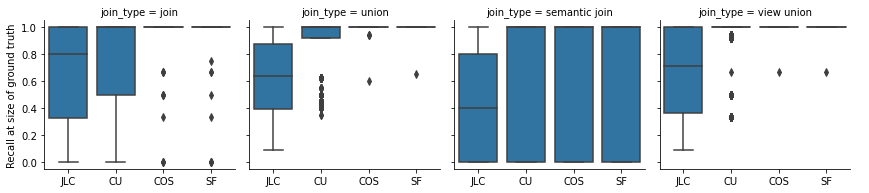

In [52]:
g = seaborn.FacetGrid(method_results_verbatimschema_schemaonly, col="join_type")
g.map_dataframe(seaborn.boxplot, y="recall_at_sizeof_ground_truth", x="short_method_name", order=["JLC", "CU", "COS", "SF"])
g.add_legend()
for i in range(4):
    g.axes[0, i].set_xlabel('')
    g.axes[0, i].set_ylabel('Recall at size of ground truth')
#plt.legend(title='Method', loc='upper right', labels=['Hell Yeh', 'Nah Bruh'])
#plt.show(g)
plt.savefig('fig/verbatim_schemata_schema_based_matching_valentine.png')

## Noisy instances, instance-based matching algorithms (Fig. 5)

### All join types

(35641, 23)
(1620, 23)


<AxesSubplot:xlabel='recall_at_sizeof_ground_truth', ylabel='simple_method_name'>

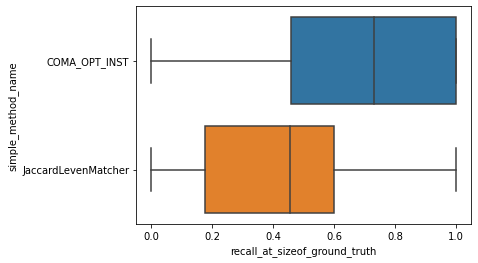

In [53]:
method_results_noisy_instances = method_results[method_results['instances_noisy_verbatim'] == "noisy"]
print(method_results_noisy_instances.shape)
method_results_noisy_instances_instanceonly = method_results_noisy_instances[method_results_noisy_instances['simple_method_name'].isin(('DistributionBased', 'JaccardLevenMatcher', 'COMA_OPT_INST'))]
print(method_results_noisy_instances_instanceonly.shape)
seaborn.boxplot(data=method_results_noisy_instances_instanceonly, x="recall_at_sizeof_ground_truth", y="simple_method_name")

In [101]:
method_results.groupby(['simple_method_name', 'instances_noisy_verbatim'])['simple_method_name'].count()

simple_method_name     instances_noisy_verbatim
COMA_OPT               noisy                         270
                       verbatim                      321
COMA_OPT_INST          noisy                         270
                       verbatim                      321
CorrelationClustering  noisy                        4860
                       verbatim                     4932
Cupid                  noisy                       25920
                       verbatim                    31521
DistributionBased      verbatim                      153
EmbDI                  noisy                         270
                       verbatim                      274
JL_ColumnNamesOnly     noisy                        1350
                       verbatim                     1640
JaccardLevenMatcher    noisy                        1350
                       verbatim                     1370
SemProp                noisy                        1081
                       verbatim         

### Divided by join case

C:\Users\Phaina\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


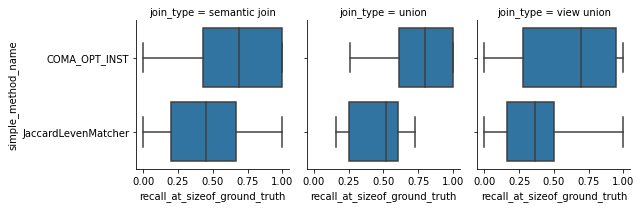

In [96]:
g = seaborn.FacetGrid(method_results_noisy_instances_instanceonly, col="join_type")
g.map(seaborn.boxplot, "recall_at_sizeof_ground_truth", "simple_method_name")

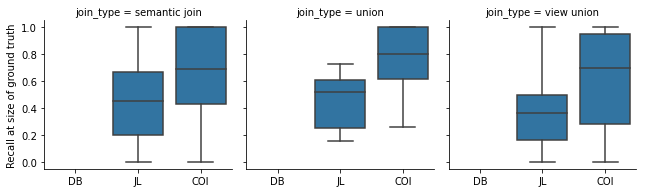

In [56]:
g = seaborn.FacetGrid(method_results_noisy_instances_instanceonly, col="join_type")
g.map_dataframe(seaborn.boxplot, y="recall_at_sizeof_ground_truth", x="short_method_name", order=["DB", "JL", "COI"])
g.add_legend()
for i in range(3):
    g.axes[0, i].set_xlabel('')
    g.axes[0, i].set_ylabel('Recall at size of ground truth')
plt.savefig('fig/noisy_instances_instance_based_matching_valentine.png')

### <span style="color:red">Warning: Can't currently find DistributionBased results on noisy instances! There must be such cases, see Fig.5 in Koutras2021. Also missing: Join cases ?!</span>

## Verbatim instances, instance-based matching algorithms (Fig. 5)

(41933, 23)
(1844, 23)


<AxesSubplot:xlabel='recall_at_sizeof_ground_truth', ylabel='simple_method_name'>

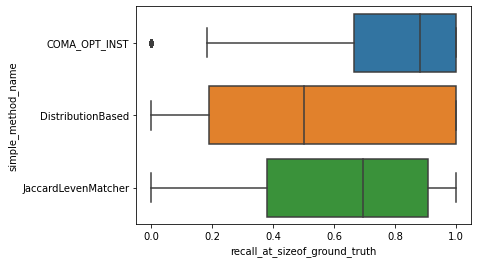

In [58]:
method_results_verbatim_instances = method_results[method_results['instances_noisy_verbatim'] == "verbatim"]
print(method_results_verbatim_instances.shape)
method_results_verbatim_instances_instanceonly = method_results_verbatim_instances[method_results_verbatim_instances['simple_method_name'].isin(('DistributionBased', 'JaccardLevenMatcher', 'COMA_OPT_INST'))]
print(method_results_verbatim_instances_instanceonly.shape)
seaborn.boxplot(data=method_results_verbatim_instances_instanceonly, x="recall_at_sizeof_ground_truth", y="simple_method_name")

In [59]:
method_results_verbatim_instances_instanceonly[method_results_verbatim_instances_instanceonly["simple_method_name"] == "DistributionBased"]

,experiment_name,method,elapsed_process_time,join_type,schema_noisy_verbatim,instances_noisy_verbatim,0,precision,recall,f1_score,...,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,0.1,precision_at_20_percent,precision_at_40_percent,precision_at_60_percent,precision_at_80_percent,simple_method_name,short_method_name
67574,book_titles-collaborative_books_df,DistributionBased_0.3_0.3,86.546875,join,verbatim,verbatim,NaN,1.000000,1.0000,1.000000,...,0.400000,0.285714,1.0000,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67575,book_titles_-_collaborative_book_metadata,DistributionBased_0.3_0.3,78.640625,join,verbatim,verbatim,NaN,0.500000,0.5000,0.500000,...,0.400000,0.285714,0.5000,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67576,collaborative_book_metadata-collaborative_book...,DistributionBased_0.3_0.3,24.343750,join,verbatim,verbatim,NaN,0.500000,1.0000,0.666667,...,0.285714,0.222222,1.0000,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67577,Frosttage_Heissetage,DistributionBased_0.3_0.3,11.203125,union,verbatim,verbatim,NaN,0.363636,0.2500,0.296296,...,0.088889,0.070175,0.2500,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67578,Frosttage_Niederschlag,DistributionBased_0.3_0.3,77.593750,union,verbatim,verbatim,NaN,0.400000,0.1250,0.190476,...,0.070707,0.070866,0.1875,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67579,Frosttage_Stationsnamen,DistributionBased_0.3_0.3,4.734375,join,verbatim,verbatim,NaN,0.333333,1.0000,0.500000,...,0.076923,0.058824,1.0000,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67580,Heissetage_Niederschlag,DistributionBased_0.3_0.3,19.218750,union,verbatim,verbatim,NaN,0.666667,0.1250,0.210526,...,0.181818,0.142857,0.1250,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67581,Heissetage_Stationsnamen,DistributionBased_0.3_0.3,4.500000,join,verbatim,verbatim,NaN,0.500000,1.0000,0.666667,...,0.333333,0.250000,1.0000,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67582,Niederschlag_Stationsnamen,DistributionBased_0.3_0.3,56.500000,join,verbatim,verbatim,NaN,0.333333,1.0000,0.500000,...,0.023810,0.018519,1.0000,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB
67583,Geographie_Parameter,DistributionBased_0.3_0.3,2.562500,join,verbatim,verbatim,NaN,0.090909,0.2500,0.133333,...,0.100000,0.076923,0.2500,NaN,NaN,NaN,NaN,NaN,DistributionBased,DB


### Divided by join case

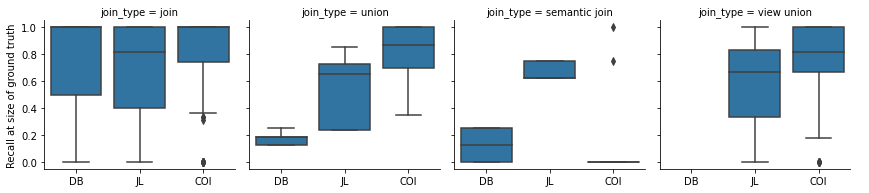

In [61]:
g = seaborn.FacetGrid(method_results_verbatim_instances_instanceonly, col="join_type")
g.map_dataframe(seaborn.boxplot, y="recall_at_sizeof_ground_truth", x="short_method_name", order=["DB", "JL", "COI"])
g.add_legend()
for i in range(4):
    g.axes[0, i].set_xlabel('')
    g.axes[0, i].set_ylabel('Recall at size of ground truth')
plt.savefig('fig/verbatim_instances_instance_based_matching_valentine.png')